In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

tweets = pd.read_csv("tweets.csv")

In [38]:
def month_year(t):
    "Convert a tweet's timestamp into month/year"
    d = pd.to_datetime(t)
    return "{0}/{1}".format(d.year, d.month)

tweets['month'] = tweets.timestamp.apply(month_year)

In [54]:
month_counts = tweets[['month', 'tweet_id']].groupby('month').aggregate('count')
month_counts.columns = ['count']

In [91]:
months = pd.date_range(start='8/1/2010', end='9/1/2015', freq='m')
ivalues = month_counts.index.values

counts = [month_counts.loc[month_year(m)][0] if month_year(m) in ivalues else 0 for m in months]

tweet_counts = pd.DataFrame(counts, months)

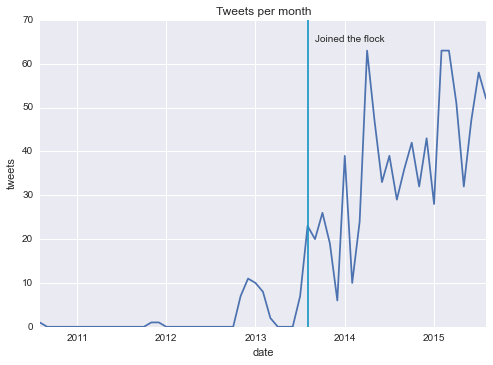

In [115]:
sns.set_style('darkgrid')
ax = tweet_counts.plot(legend=False, title="Tweets per month")
ax.set_xlabel("date")
ax.set_ylabel("tweets")
plt.axvline('2013-08-26', color='#1F98C7')
plt.annotate("Joined the flock", ('2013-09-02', 65))
plt.savefig("tweet_counts.png")